In [1]:
# Import Modules #
import os, sys, importlib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


# Load Example Data

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df['label']=data['target']
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.40, random_state=123)

## Excluding features for the reference model just for the example

In [4]:
ref_feat, new_feat, bla = [],[], []
for i in data['feature_names']:
    if 'fractal' in i or 'smoothness' in i or 'texture' in i or 'concave' in i or 'compactness' in i:
        ref_feat+=[i]
    else:
        bla+=[i]
    new_feat+=[i]
len(ref_feat),len(new_feat)

(15, 30)

# Model

In [5]:
ref_model = RandomForestClassifier()#max_depth=5, n_estimators=100, verbose=1,random_state=0)
new_model = RandomForestClassifier()#max_depth=5, n_estimators=100, verbose=1,random_state=0)
ref_model.fit(x_train[ref_feat], y_train)
new_model.fit(x_train[new_feat], y_train)

RandomForestClassifier()

In [6]:
test_ref_pred=ref_model.predict_proba(x_test[ref_feat])
test_new_pred=new_model.predict_proba(x_test[new_feat])

# Area Under the Curve with CI

Reference AUC: 0.9840503246753247
New AUC: 0.9944805194805195


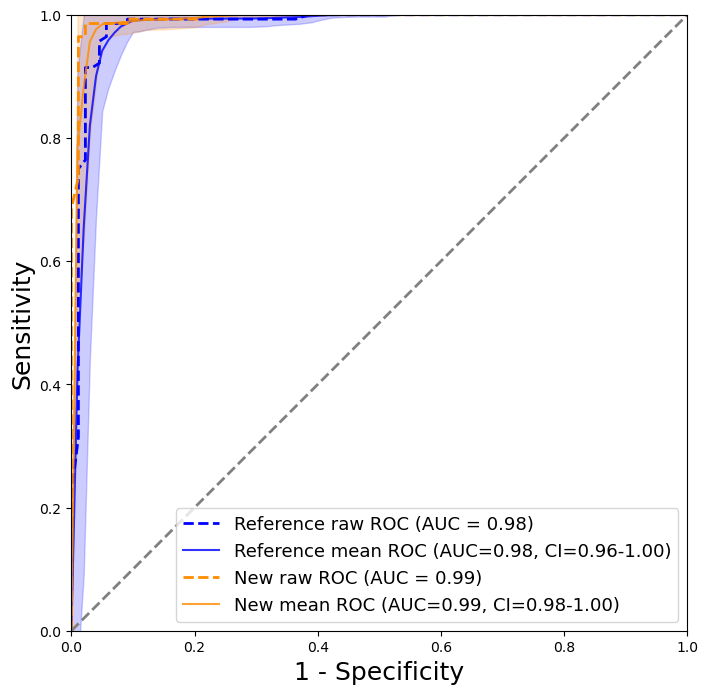

In [35]:
more_metrics.plot_comparing_aucs(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],n_bootstraps=1000)

# Net Reclassification Index 

In [36]:
print(more_metrics.category_free_nri(y_test.values,test_ref_pred[:,1],test_new_pred[:,1]))

(0.5214285714285715, 0.5795454545454546, 1.100974025974026)


In [30]:
print(more_metrics.nri(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],  [0.02,0.1,0.5,0.95]))

(0.12142857142857141, 0.47727272727272724, 0.5987012987012986)


# IDI Curve

IS positive 3.7 IS negative 0.09 IDI events 3.61
IP positive 4.89 IP negative 0.0 IDI nonevents 4.89
IDI = 8.5
0.04 1.04 0.02 1.0
Threshold = 0.02 NRI events = 0.0 NRI nonevents = 0.3768 Total = 0.3768
Threshold = 0.1 NRI events = 0.0005 NRI nonevents = 0.1318 Total = 0.1324
Threshold = 0.5 NRI events = 0.0156 NRI nonevents = 0.0305 Total = 0.0461
Threshold = 0.95 NRI events = 0.1196 NRI nonevents = 0.0136 Total = 0.1332


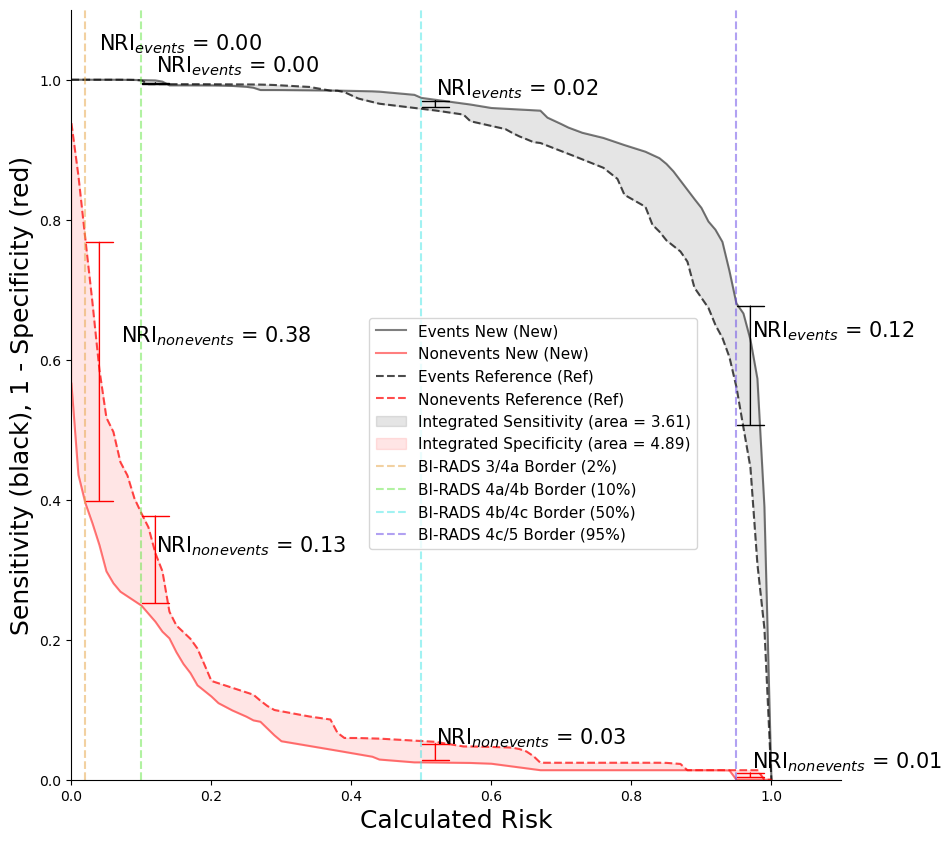

In [37]:
more_metrics.plot_idi(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],{2:'BI-RADS 3/4a Border (2%)',10:'BI-RADS 4a/4b Border (10%)',50:'BI-RADS 4b/4c Border (50%)',95:'BI-RADS 4c/5 Border (95%)'})

## New functions allow for different number of theresholds

### Example of only looking at the BI-RADS 3 and 4 threshold

In [38]:
print(more_metrics.nri(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],  [0.02]))

(0.0, 0.38636363636363635, 0.38636363636363635)


IS positive 3.7 IS negative 0.09 IDI events 3.61
IP positive 4.89 IP negative 0.0 IDI nonevents 4.89
IDI = 8.5
0.04 1.04 0.02 1.0
Threshold = 0.02 NRI events = 0.0 NRI nonevents = 0.3768 Total = 0.3768


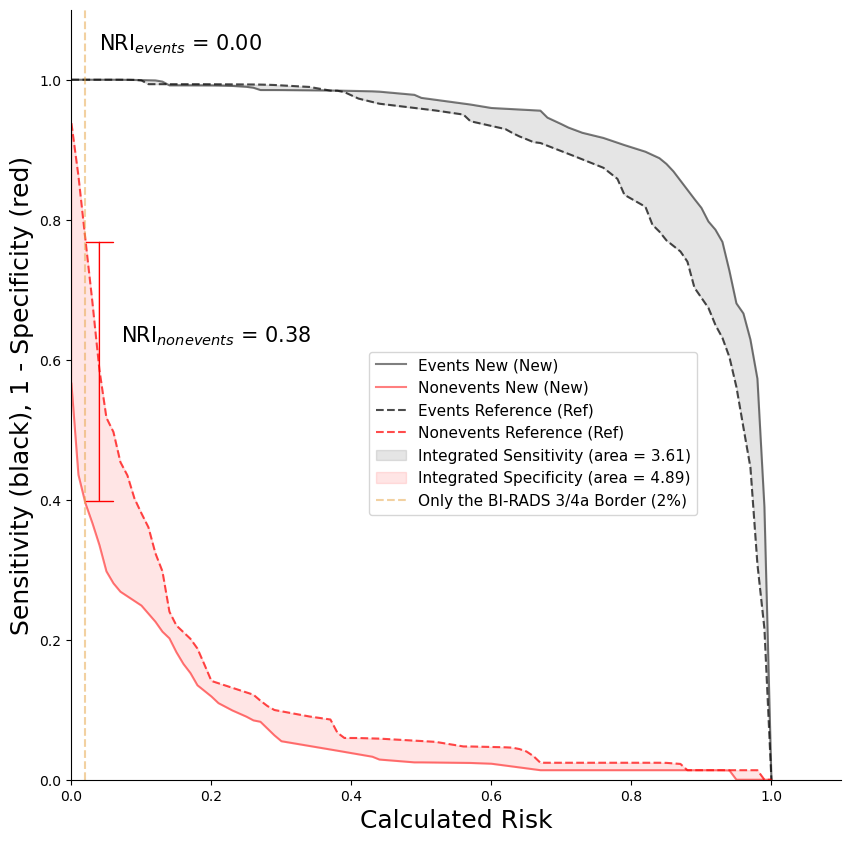

In [39]:
more_metrics.plot_idi(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],{2:'Only the BI-RADS 3/4a Border (2%)',})

In [21]:
sys.exit(0)

SystemExit: 0

/home/laleong/anaconda3/envs/uwrad_23/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
